In [9]:
# %load ../start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 1

# Set up cashdir
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
import sys
sys.path.insert(0, '../../lib/python')


last updated: 2016-09-21 

CPython 3.5.2
IPython 5.1.0


In [10]:
# imports
import os
from glob import glob
import gzip

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [3]:
def translate(x):
    t = []
    for v in x:
        if v.startswith('000'):
            t.append(0)
        else:
            t.append(float(v.lstrip('0')))
    return t

In [12]:
%%cache -s jean_expression.pkl jean
dfs = []
for file in glob('../../data/jean/Expression/dd*GENE*.gz'):
    with gzip.open(file, 'rt') as fh:
        cnt = 0
        rows = []
        fbgns = []
        for row in fh:
            row = row.strip()
            if cnt == 26:
                cols = row.split('\t')
                download = cols[11]
                header = cols[13:]
            elif cnt > 30:
                cols = row.split('\t')
                fbgn = cols[0]
                values = cols[13:]
                rows.append(translate(values))
                fbgns.append(fbgn)
            cnt+=1

    dfs.append(pd.DataFrame(rows, columns=header, index=fbgns))

jean = pd.concat(dfs, axis=1)

In [13]:
# Data are log so there are -inf number due to log(0) replace those with 0
jean.replace(np.inf, 0, inplace=True)
jean.replace(-np.inf, 0, inplace=True)
jean.fillna(0, inplace=True)

In [14]:
# drop rows and columsn that have all 0's
c_zero = (jean == 0).all(axis=0)
r_zero = (jean == 0).all(axis=1)
cleaned = jean.loc[~r_zero, ~c_zero]
cleaned_cols = cleaned.columns.tolist()
cleaned_rows = cleaned.index.tolist()
del jean

In [ ]:
%%cache -s jean_expression_pca_projection.pkl jean
# Standardize (x-u)/std
scaler = StandardScaler()
scaled = scaler.fit_transform(cleaned.values)
del cleaned

# Build PCA
pca = IncrementalPCA(whiten=True)

# Calcualte projection
projection = pca.fit_transform(scaled)

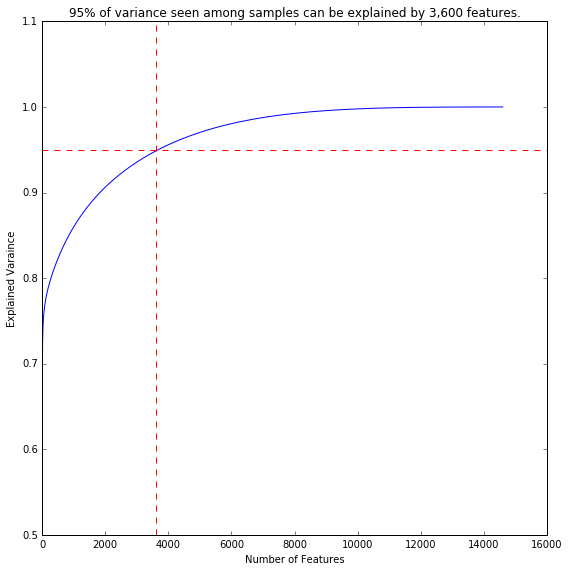

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.axvline(3600, color='r', ls='--')
ax.axhline(.95, color='r', ls='--')
ax.set_title("95% of variance seen among samples can be explained by 3,600 features.")
ax.set_ylabel('Explained Varaince')
ax.set_xlabel('Number of Features')
plt.tight_layout()

In [184]:
jean_projected = projection[:, :3600]

(17011, 3600)

In [186]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
agg = AgglomerativeClustering(linkage='average')

NameError: name 'AgglomerativeClustering' is not defined

In [6]:
agg_labels = agg.fit_predict(jean_projected)

NameError: name 'agg' is not defined